question 1

In [1]:
import pandas as pd

file_path = r"C:\Users\krmch\OneDrive\Desktop\specs\specs\question_1.csv"


data = pd.read_csv(file_path)



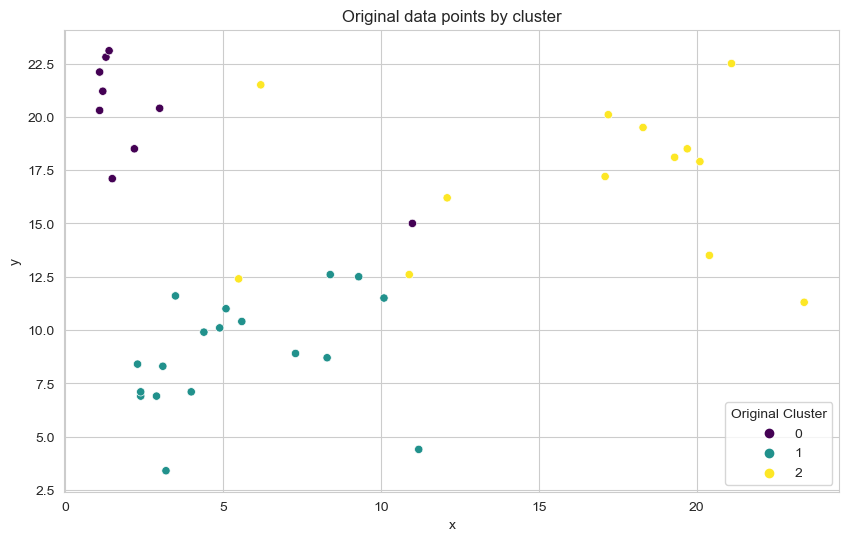

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='x', y='y', hue='org_cluster', palette='viridis', legend='full')
scatter.set_title('Original data points by cluster')
plt.legend(title='Original Cluster')
plt.show()


C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarnin

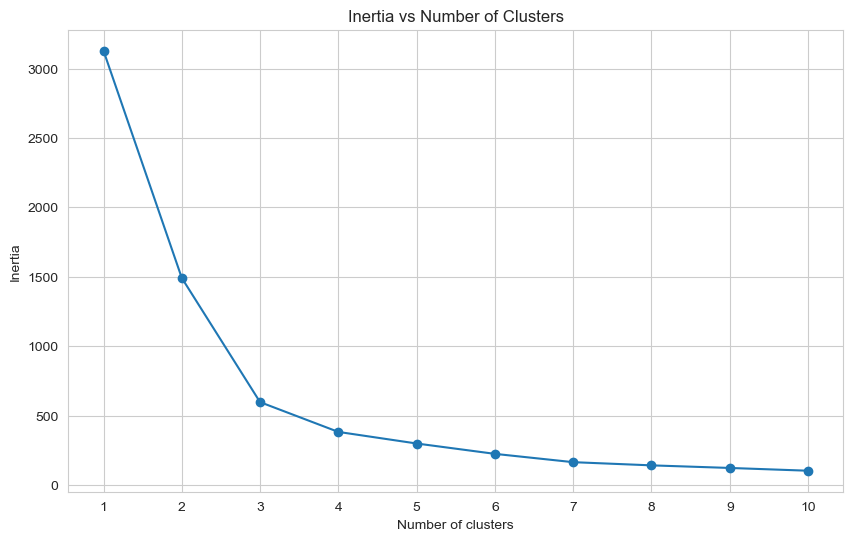

In [3]:
from sklearn.cluster import KMeans


num_clusters = range(1, 11)


inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[['x', 'y']])
    inertia.append(kmeans.inertia_)

# Plotting inertia against the number of clusters (you might need to scroll down a bit through warnings to see plot )
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()


using the elbow method the reduction in inertia slows down at around 3 clusters thus the best number of clusters is 3 as beyond 3 there are not substantial improvements in clustering 

In [4]:
from sklearn.metrics import rand_score, silhouette_score




kmeans = KMeans(n_clusters=3, random_state=0)
data['kmeans_cluster'] = kmeans.fit_predict(data[['x', 'y']])

rand_index = rand_score(data['org_cluster'], data['kmeans_cluster'])




silhouette_score_value = silhouette_score(data[['x', 'y']], data['kmeans_cluster'])

(rand_index, silhouette_score_value)


C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(0.8666666666666667, 0.609307520786181)

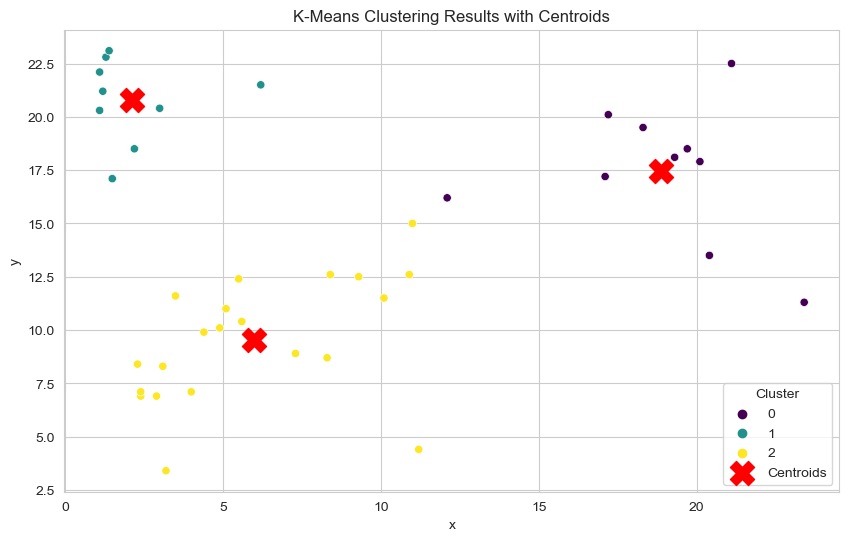

In [5]:


plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='x', y='y', hue='kmeans_cluster',  palette='viridis',  legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
scatter.set_title('K-Means Clustering Results with Centroids')
plt.legend(title='Cluster')
plt.show()


Question 2 

In [6]:
import pandas as pd

file_path_2 = r"C:\Users\krmch\OneDrive\Desktop\question_2.csv"


data_2 = pd.read_csv(file_path_2)



In [7]:
data_2.columns = data_2.columns.str.strip()

cereal_data = data_2.drop(columns=['NAME', 'MANUF', 'TYPE', 'RATING'])

#show
cereal_data.head()


,CALORIES,PROTEIN,FAT,SODIUM,FIBER,CARBO,SUGARS,POTASS,VITAMINS,SHELF,WEIGHT,CUPS
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


In [8]:
from sklearn.cluster import KMeans


# kmeans 5 clusters 5 runs 100 steps 
kmeans_config1 = KMeans(n_clusters=5, n_init=5, max_iter=100, random_state=0)
cereal_data['config1'] = kmeans_config1.fit_predict(cereal_data)


C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# kmeans 5 clusters 100 runs 100 steps 
kmeans_config2 = KMeans(n_clusters=5, n_init=100, max_iter=100, random_state=0)
cereal_data['config2'] = kmeans_config2.fit_predict(cereal_data)

# Now to Compare the results of config1 and config2.....
comparison_config1_config2 = (cereal_data['config1'] == cereal_data['config2'])
comparison_results = comparison_config1_config2.value_counts()

print(comparison_results)


C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


False    60
True     17
dtype: int64


the cluster assignments differ in 60 out of 77 cases between the 2 configurations. Only 17 instances assigned to the same cluster in both configurations. This suggests increasing the number of initialization runs from 5 to 100 changed the clustering results.



In [10]:
# kmeans 3 clusters and 100 steps 
kmeans_config3 = KMeans(n_clusters=3, n_init=100, max_iter=100,  random_state=0)
cereal_data['config3'] = kmeans_config3.fit_predict(cereal_data)


C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


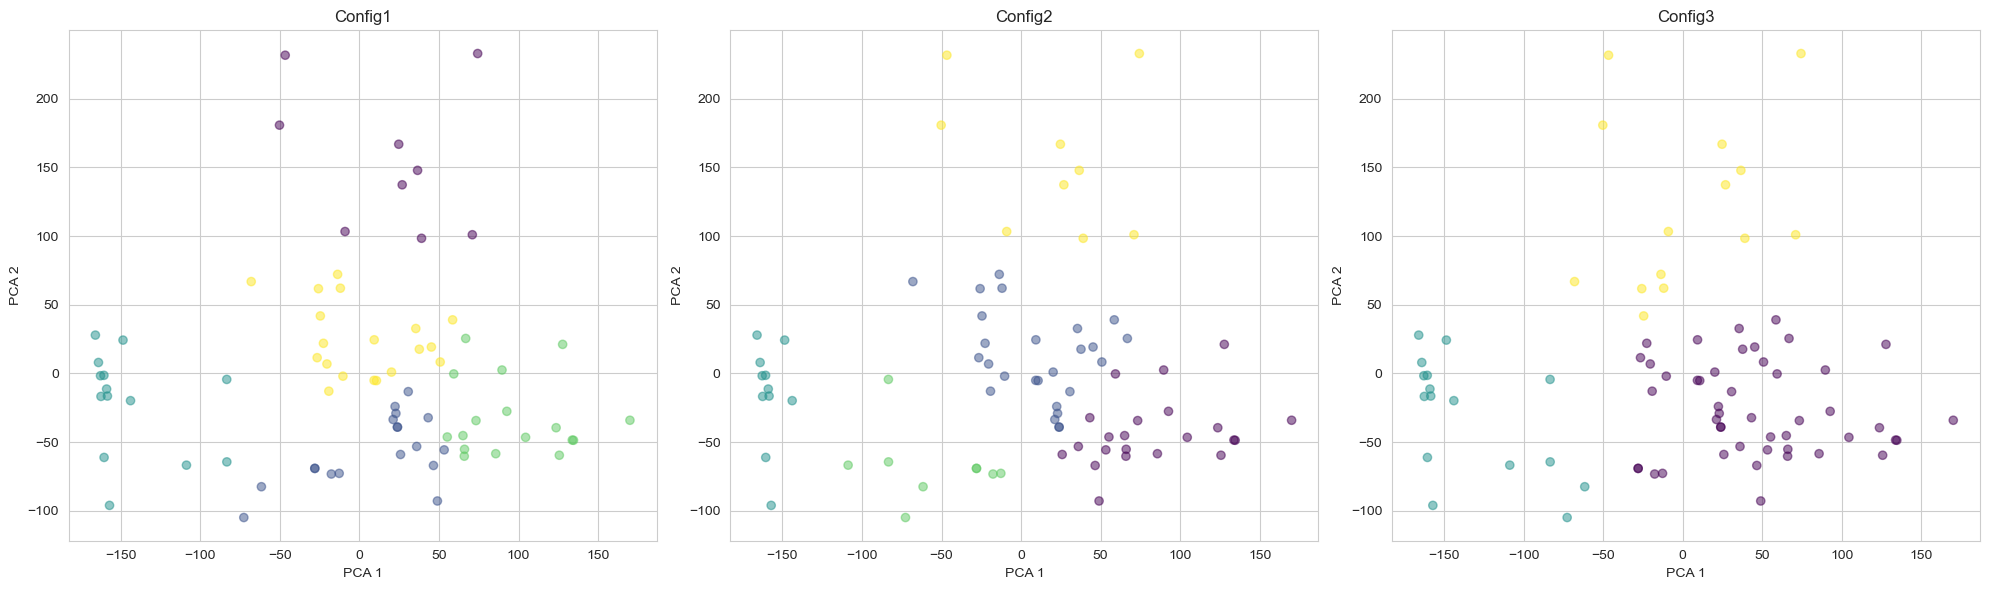

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
cereal_pca = pca.fit_transform(cereal_data.drop(columns=['config1', 'config2', 'config3']))


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# config 1 
axes[0].scatter(cereal_pca[:, 0], cereal_pca[:, 1], c=cereal_data['config1'], cmap='viridis', alpha=0.5)
axes[0].set_title('Config1')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

# config 2


axes[1].scatter(cereal_pca[:, 0], cereal_pca[:, 1], c=cereal_data['config2'], cmap='viridis', alpha=0.5)
axes[1].set_title('Config2')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')

# config 3  
axes[2].scatter(cereal_pca[:, 0], cereal_pca[:, 1], c=cereal_data['config3'], cmap='viridis', alpha=0.5)
axes[2].set_title('Config3')
axes[2].set_xlabel('PCA 1')
axes[2].set_ylabel('PCA 2')

# show
plt.tight_layout()
plt.show()


which config is best ?

on inspection config3 is best because it has the best cluster separation making it more useful and interpretable 

QUESTION 3 part 1 

In [12]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "C:/Users/krmch/OneDrive/Desktop/question_3.csv"
data3 = pd.read_csv(file_path)


In [13]:
data_kmeans = data3.drop(columns=['ID'])

In [14]:
kmeans = KMeans(n_clusters=7, n_init=5, max_iter=100, random_state=0)
data_kmeans['k-means'] = kmeans.fit_predict(data_kmeans[['x', 'y']])

C:\Users\krmch\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Queestion 3 part 2 

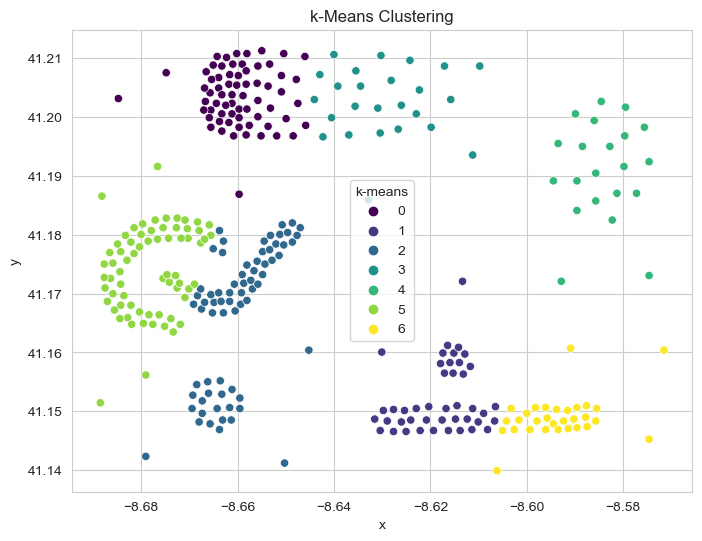

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_kmeans, x='x', y='y', hue='k-means', palette='viridis')
plt.title('k-Means Clustering')
plt.show()

Clusters are well separated 

K means assumes clusters are spherical. A few clusters here have 
elongated shapes i.e not spherical.

cluster density varies. some clusters not very dense 

many clusters seem to have outliers


Conclusion 

based on all this while k means has managed to group the data into separate clusters it may not be best for this dataset. Other clustering algorithms may be better as they dont make assumptions about shape like DBSCAN

Question 3 part 3 

In [16]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_kmeans[['x', 'y']])

In [17]:
dbscan1 = DBSCAN(eps=0.4, min_samples=4, metric='euclidean')
data_kmeans['dbscan1'] = dbscan1.fit_predict(normalized_data)

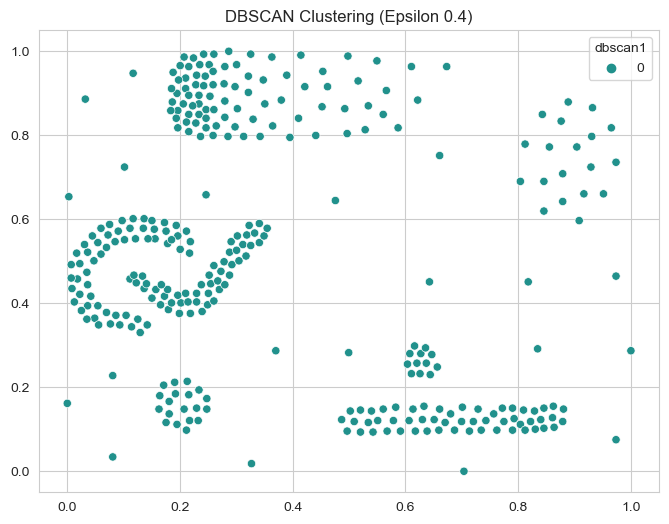

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=normalized_data[:, 0], y=normalized_data[:, 1], hue=data_kmeans['dbscan1'], palette='viridis')
plt.title('DBSCAN Clustering (Epsilon 0.4)')
plt.show()

In [19]:
dbscan2 = DBSCAN(eps=0.08, min_samples=4, metric='euclidean')
data_kmeans['dbscan2'] = dbscan2.fit_predict(normalized_data)

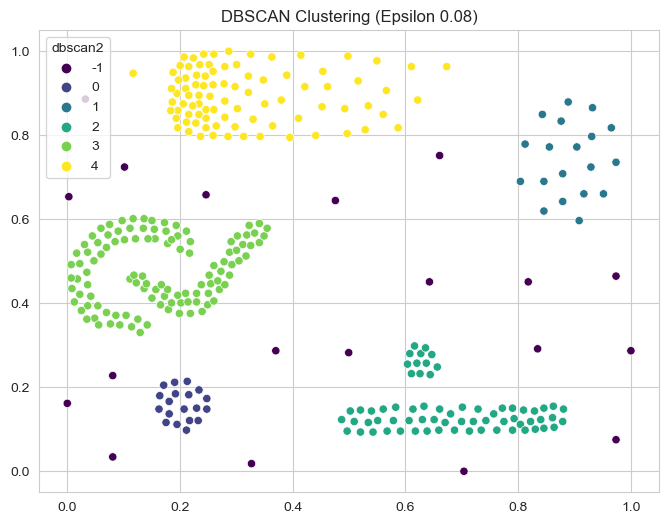

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=normalized_data[:, 0], y=normalized_data[:, 1], hue=data_kmeans['dbscan2'], palette='viridis')
plt.title('DBSCAN Clustering (Epsilon 0.08)')
plt.show()

Which one is best and why ?

Based on visual inspection I feel the DBSCAN2 (Epsilon 0.8) is the best out of the 3.

It captures the complexity and structure of the dataset more effectivelty than the other 2. DBSCAN1 identified the points as belonging to one cluster so is not helpful. DBSCAN2 also good because it delineated the spiral pattern which the others failed to do. DBSCAN2 maintains a good balance between capturing the structure but not overfitting so is well balanced. Given these findings I think DBSCAN2 is the best of the 3.